In [1]:
import ROOT as r
import sys
import os

Welcome to JupyROOT 6.26/10


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
r.gSystem.Load("../lib/libdataProducts.so")
r.gSystem.Load("../lib/libunpackers.so")

0

In [4]:
# f = r.TFile("~/nearline_hists_run00207_00000.root")
# f = r.TFile("../bin/run00207_00000.mid.root")
f = r.TFile("../bin/run00239_00000.mid.root")

f.ls()

TFile**		../bin/run00239_00000.mid.root	
 TFile*		../bin/run00239_00000.mid.root	
  KEY: TProcessID	ProcessID0;1	01c5baba-718f-11ee-8a74-42d716acbeef
  KEY: TDirectoryFile	splines;1	splines
  KEY: TDirectoryFile	hists;1	hists
  KEY: TTree	tree;1	tree


In [5]:
f.Get("hists/uncalibrated").ls()

TDirectoryFile*		uncalibrated	uncalibrated
 KEY: TH1I	uncalibrated_0_1_0;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 0
 KEY: TH1I	uncalibrated_0_1_1;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 1
 KEY: TH1I	uncalibrated_0_1_2;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 2
 KEY: TH1I	uncalibrated_0_1_3;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 3
 KEY: TH1I	uncalibrated_0_1_4;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 1 | Channel 4
 KEY: TH1I	uncalibrated_0_2_0;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 2 | Channel 0
 KEY: TH1I	uncalibrated_0_2_1;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 2 | Channel 1
 KEY: TH1I	uncalibrated_0_2_2;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 2 | Channel 2
 KEY: TH1I	uncalibrated_0_2_3;1	Uncalibrated Restricted Width Integrals: Crate 0 | AMC 2 | Channel 3
 KEY: TH1I	uncalibrated_0_2_4;1	Uncalibrated Res

In [6]:
t = f.Get("tree")
t.Print()

******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :     1827 : Total =        64430906 bytes  File  Size =   29113506 *
*        :          : Tree compression factor =   2.21                       *
******************************************************************************
*Br    0 :waveforms_raw : Int_t waveforms_raw_                               *
*Entries :     1827 : Total  Size=      61105 bytes  File Size  =       2406 *
*Baskets :        1 : Basket Size=      32000 bytes  Compression=   6.11     *
*............................................................................*
*Br    1 :waveforms_raw.fUniqueID : UInt_t fUniqueID[waveforms_raw_]         *
*Entries :     1827 : Total  Size=      81295 bytes  File Size  =      29336 *
*Baskets :        3 : Basket Size=      32000 bytes  Compression=   2.75     *
*...................................................

In [7]:
amc = 1
chan = 1
h = f.Get(f"hists/uncalibrated/uncalibrated_0_{amc}_{chan}")
cutstring = f'(integrals.amcNum == {amc}) && (integrals.channelTag == {chan})'
h

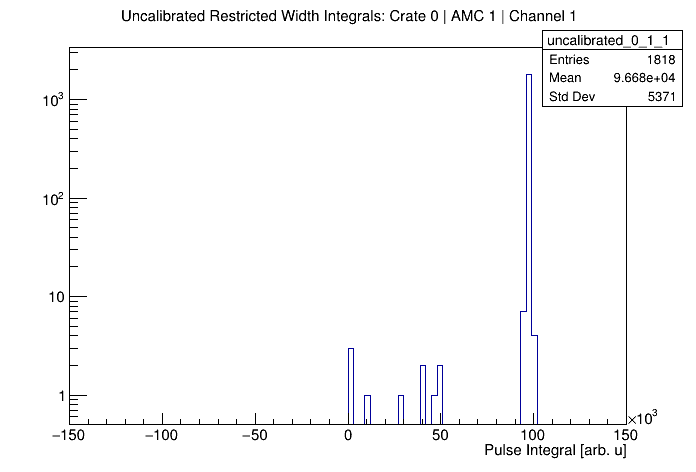

In [8]:
c = r.TCanvas()
h.Draw()
c.SetLogy()
c.Draw()

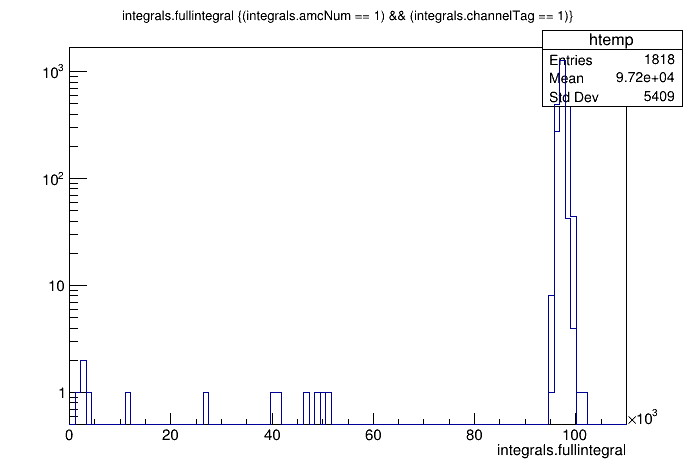

In [9]:
c = r.TCanvas()
t.Draw("integrals.fullintegral", cutstring)
t.Draw("integrals.integral",cutstring,"same")
c.SetLogy()
c.Draw()

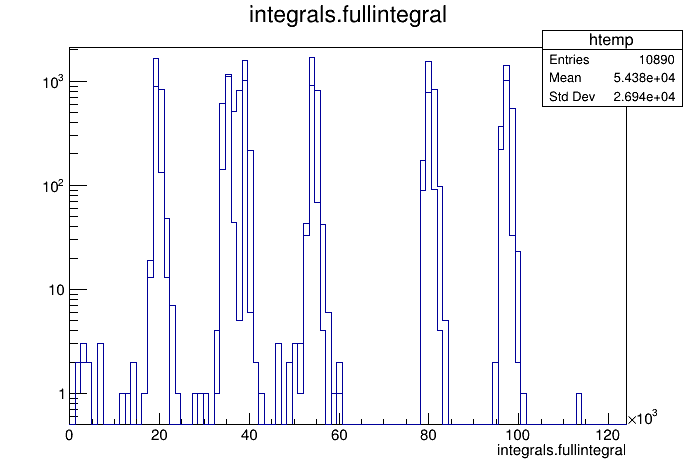

In [10]:
c = r.TCanvas()
t.Draw("integrals.fullintegral")
t.Draw("integrals.integral","","same")
c.SetLogy()
c.Draw()

In [11]:
def plot_integral(w,ax=None):
    if(ax is None):
        fig,ax = plt.subplots()
    else:
        fig = plt.gcf()
        
    wf = w.raw.GetObject()
    trace = np.array(wf.trace)
    samples = range(len(trace))
    ped = np.full_like(samples, wf.pedestalLevel)
    plt.plot(samples,trace,color='C0', label=f'Full Integral: {w.fullintegral:.2f}')
    cut = np.full_like(trace, False)
    cut[w.integration_window.first:w.integration_window.second] = True
    plt.plot(samples,np.where(cut, trace, np.nan), color='C1', label=f'Restricted Integral: {w.integral:.2f}')
    plt.plot(samples,ped, color='C2')
    plt.fill_between(samples, ped-wf.pedestalStdev, ped+wf.pedestalStdev, alpha=0.2, color='C2')
    title = f'AMC Number: {wf.amcNum}\nChannel: {wf.channelTag}\nEvent: {wf.eventNum}'
    plt.legend(title=title)
    # plt.show()
    return fig,ax

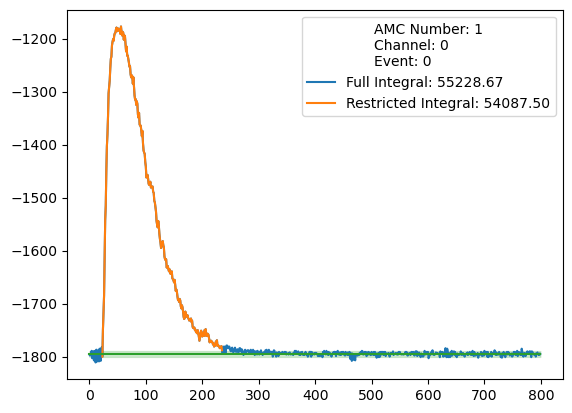

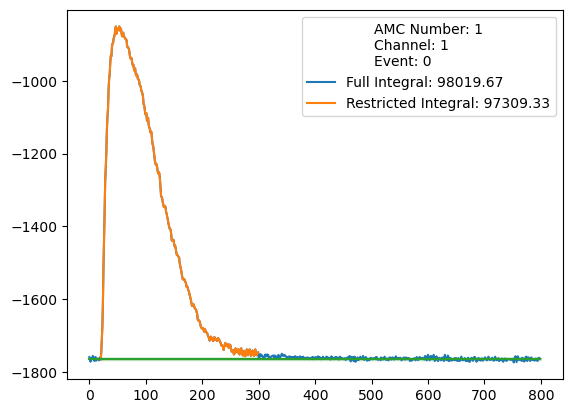

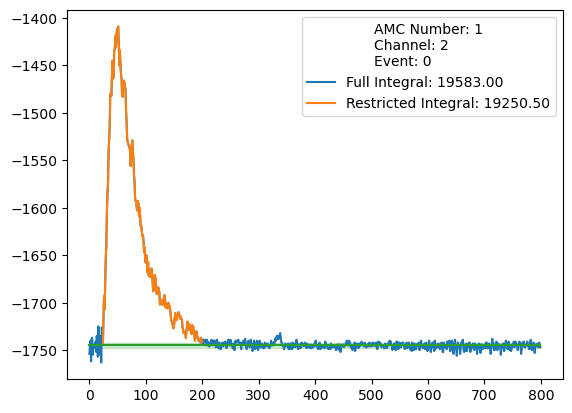

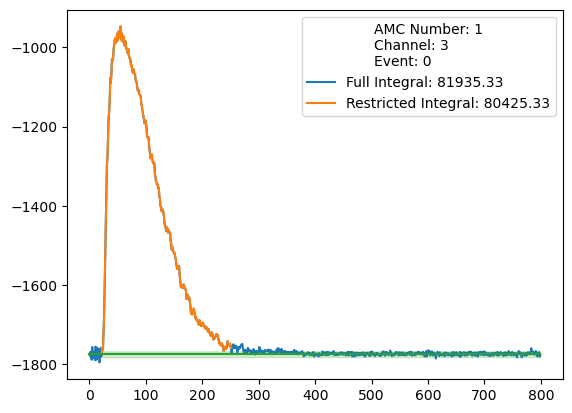

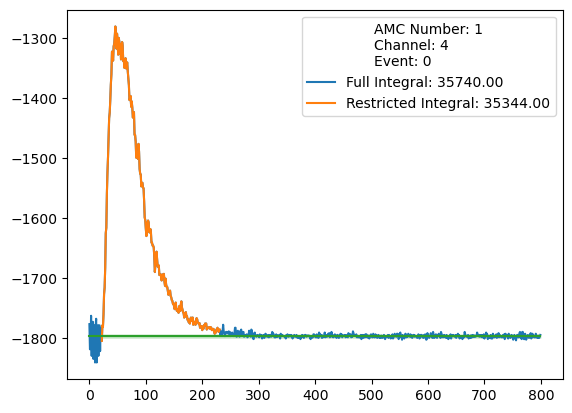

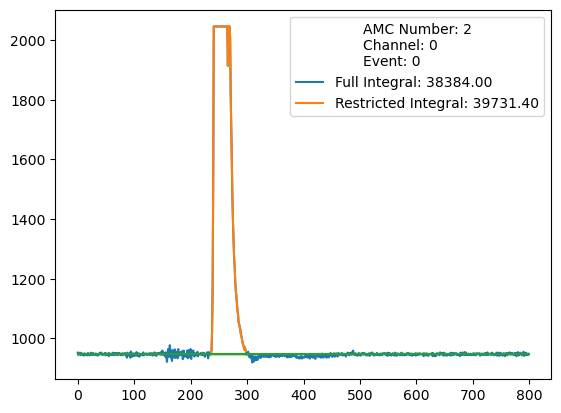

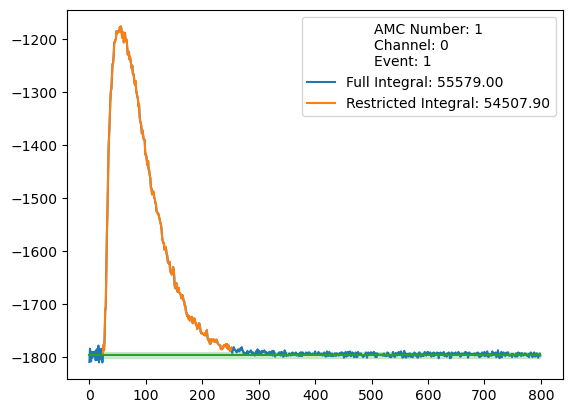

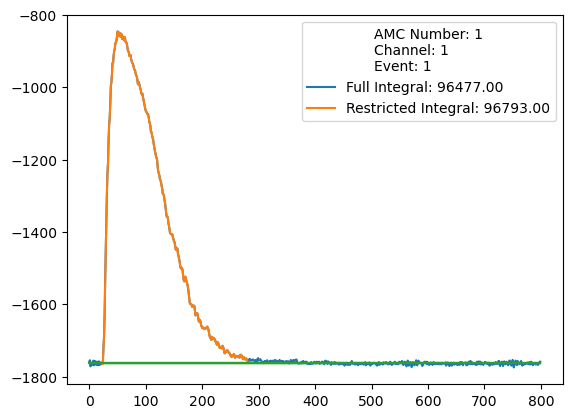

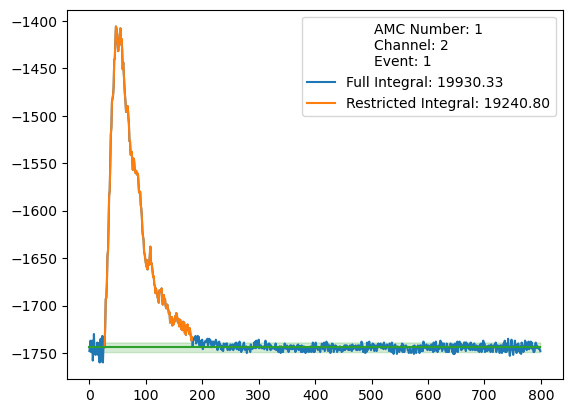

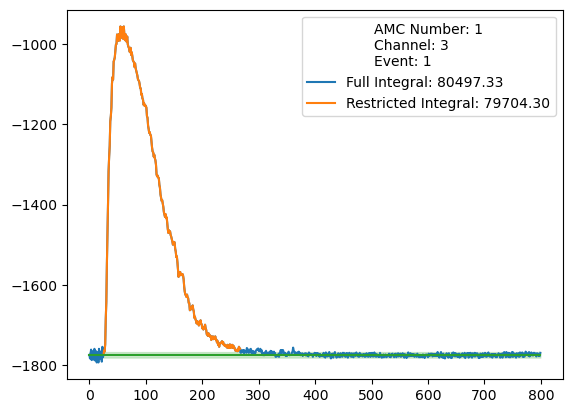

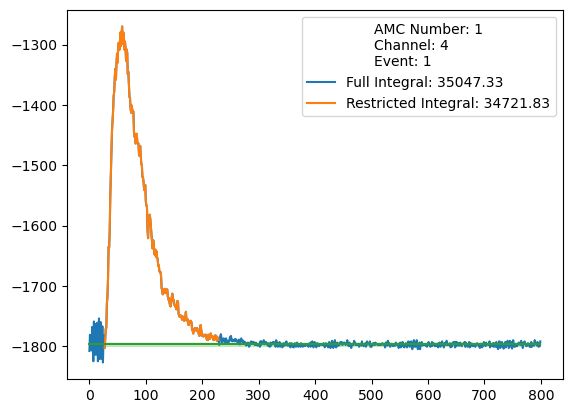

In [12]:
counter = 0
for i, e in enumerate(t):
    for j, wf in enumerate(e.integrals):
        if(wf.integral > 1e3):
            plot_integral(wf)
            plt.show()
            counter += 1
            if(counter > 10):
                break
    if(counter > 10):
        break
            

In [13]:
t.GetEntries()

1827

In [14]:
t.GetEntry(0)

34758

In [15]:
for i, e in enumerate(t):
    ints = t.integrals
    if(ints.size() > 0):
        print(ints, ints.size())
        break

{ @0x55ec025eaff0, @0x55ec025eb068, @0x55ec025eb0e0, @0x55ec025eb158, @0x55ec025eb1d0, @0x55ec025eb248 } 6


In [ ]:
w = ints[0]
wf = w.raw.GetObject()
w,wf

In [ ]:
wf.pedestalLevel, wf.pedestalStdev

In [ ]:
w.pedestalLevel

In [ ]:
w.integral

In [ ]:
w.fullintegral

In [ ]:
np.sum(wf.trace) - wf.pedestalLevel*wf.trace.size()

In [ ]:
w.pedestalLevel

In [ ]:
wf.pedestalLevel

In [ ]:
threshold = w.pedestalLevel + wf.pedestalStdev*3
threshold

In [ ]:
np.array(wf.trace[:15])

In [ ]:
np.array(wf.trace[:15]) > threshold

In [ ]:
w.integration_window.first,w.integration_window.second

In [ ]:
w.fullintegral

In [ ]:
w.nsigma

In [ ]:
wf.Show()